In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Ecommerce Customers.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


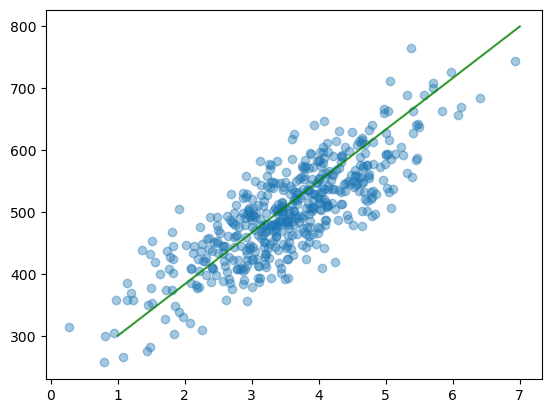

In [15]:
plt.scatter(df['Length of Membership'], df['Yearly Amount Spent'], alpha=0.4)
plt.plot([1,7], [300, 800], 'green', alpha=0.8)

In [46]:
from sklearn.model_selection import train_test_split

X = df['Length of Membership']
y = df['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [31]:
model.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

LinearRegression()

In [42]:
y_train_pred = model.predict(X_train.values.reshape(-1, 1))

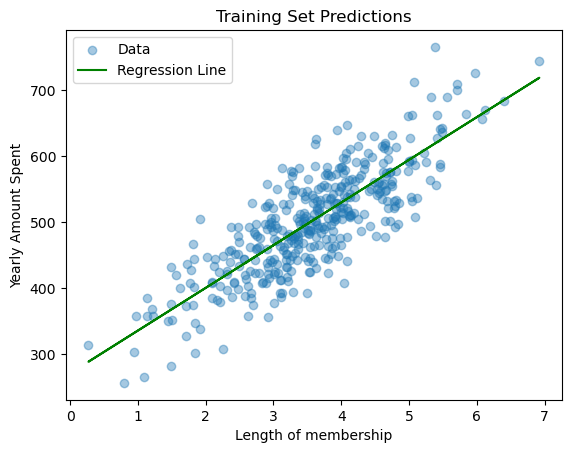

In [43]:
plt.scatter(X_train, y_train, alpha=0.4, label='Data')
plt.plot(X_train, y_train_pred, color='green', label='Regression Line')
plt.xlabel('Length of membership')
plt.ylabel('Yearly Amount Spent')
plt.legend()
plt.title('Training Set Predictions')
plt.show()

In [44]:
y_test_pred = model.predict(X_test.values.reshape(-1, 1))

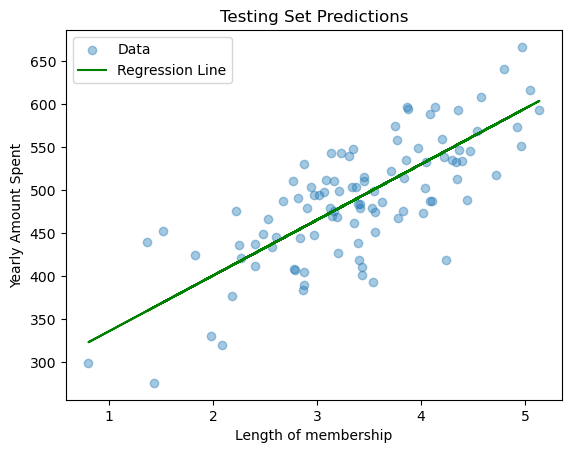

In [ ]:
plt.scatter(X_test, y_test, alpha=0.4, label='Data')
plt.plot(X_test, y_test_pred, color='green', label='Regression Line')
plt.xlabel('Length of membership')
plt.ylabel('Yearly Amount Spent')
plt.legend()
plt.title('Testing Set Predictions')
plt.show()

In [52]:
print(f'Weight (w) = {model.coef_[0][0]:.2f}')
print(f'Bias (b) = {model.intercept_[0]:.2f}')

Weight (w) = 64.64
Bias (b) = 271.35


In [75]:
yhat = 64.64 * 3.634996 + 271.35
y = 518.786483
print(f'y = {y}\nyhat = {yhat}')

y = 518.786483
yhat = 506.31614144


### Calculating the loss (MSE)

In [74]:
loss = (yhat - y) ** 2
print(f'loss: {loss}')

loss: 155.50941862306203


In [87]:
def loss(w, y):
    return (((w * 3.634996) + 271.35) - y) ** 2

y = 518.786483
ws = np.arange(0, 100, 2.5)

losses = loss(ws, y)
losses

array([6.12248131e+04, 5.68102425e+04, 5.25608368e+04, 4.84765960e+04,
       4.45575202e+04, 4.08036093e+04, 3.72148634e+04, 3.37912825e+04,
       3.05328664e+04, 2.74396154e+04, 2.45115293e+04, 2.17486081e+04,
       1.91508519e+04, 1.67182606e+04, 1.44508343e+04, 1.23485729e+04,
       1.04114765e+04, 8.63954504e+03, 7.03277852e+03, 5.59117695e+03,
       4.31474032e+03, 3.20346865e+03, 2.25736192e+03, 1.47642014e+03,
       8.60643316e+02, 4.10031437e+02, 1.24584507e+02, 4.30252551e+00,
       4.91854932e+01, 2.59233410e+02, 6.34446276e+02, 1.17482409e+03,
       1.88036685e+03, 2.75107457e+03, 3.78694723e+03, 4.98798484e+03,
       6.35418740e+03, 7.88555491e+03, 9.58208737e+03, 1.14437848e+04])